# “Climate4R: Un entorno de R para el manejo y procesamiento de datos climáticos”

**Profesores:**

Dr. Jorge Baño-Medina, Dra Josipa Milovac, Dr. Jesús Fernández
Instituto de Física de Cantabria (IFCA), CSIC-Universidad de Cantabria, Santander, España

Lic. Rocío Balmaceda-Huarte, Lic. Matías Olmo, Dra. María Laura Bettolli
Departamento de Ciencias de la Atmósfera y los Océanos-FCEN-UBA, Argentina

**Descripción del curso:** 

En este curso se introduce climate4R, que es un conjunto de
librerías de R para el acceso, manejo y procesamiento de datos climáticos en el mismo
entorno computacional. Estas librerías están desarrolladas por el Grupo de Meteorología de
Santander (https://meteo.unican.es) y el curso será impartido conjuntamente por profesores
de este grupo y del Departamento de Ciencias de la Atmósfera y los Océanos. El curso
consiste en 5 módulos donde se utilizan las librerías de climate4R para cargar datos
climáticos en diferentes formatos, procesar, aplicar técnicas de bias correction y
downscaling, realizar predicción estacional y elaborar índices climáticos de interés, tales
como los índices de extremos climáticos del ETCCDI como índices de impacto (SPI, SPEI,
etc). Además, el curso se complementa con una descripción del Atlas Interactivo del IPCC
(un producto presente en el último informe del IPCC-AR6, https://interactive-atlas.ipcc.ch/) y
su integración con climate4R (https://github.com/SantanderMetGroup/ATLAS).

El curso consistirá en 5 módulos más un curso introductorio sobre los recursos computacionales en los que se apoya la infraestructura de climate4R:

**0. Infraestructura de climate4R:** 

**1. Primeros pasos con climate4R**: Acceso, manejo, interpolación, procesamiento y visualización de datos climáticos en
distintos formatos (datos de estación, reanálisis, simulaciones de modelos
regionales, globales)
https://github.com/SantanderMetGroup/climate4R/blob/master/notebooks/2018_clima
te4R_example1.ipynb

**2. Interactive Atlas IPCC y notebooks**: Presentación del Atlas interactivo y sus componentes. Síntesis climática en las
distintas regiones del AR6, integración con climate4R, cálculo de índices de
extremos climáticos del ETCCDI
https://github.com/IPCC-WG1/Atlas/blob/main/notebooks/reference-regions_R.ipynb

**3. Downscaling de proyecciones climáticas**: Introducción de las distintas técnicas estadísticas para la corrección de bias y
downscaling (algoritmos, regresiones y técnicas de machine learning)
https://github.com/SantanderMetGroup/notebooks/blob/master/2019_downscaleR_G
MD.pdf

**4. Predicción estacional:** Acceso y carga de simulaciones de predicción estacional, manejo de ensambles,
visualización y verificación de pronósticos
https://github.com/SantanderMetGroup/notebooks/blob/master/2018_ECOMS-UDG_
ClimateServices.pdf

**5. Evaluaciones climáticas de proyecciones e impactos**
Cálculo de distintos índices de impacto, ejemplos de proyecciones futuras usando el
SPEI
https://github.com/SantanderMetGroup/notebooks/blob/master/2018_drought4R_NC
OMMS.pdf


La documentación necesaria para instalar climate4R se encuentra en el repositorio de GitHub (https://github.com/SantanderMetGroup/climate4R). En dicho repositorio se muestran dos maneras distintas de proceder a la instalación, ya sea mediante (mini)conda ó a través del paquete `devtools` que realiza una instalación directa desde github.

Una vez instalado climate4R, podemos cargar sus librerías. A continuación se procederá a la realización de los 5 módulos del curso, cargando en cada uno de los casos las librerías de climate4R necesarias.

## 1. Primeros pasos con climate4R:
En este primera sección vamos a ver como realizar operaciones básicas con datos climáticos a través de 3 librerías esenciales de climate4R (loadeR, transformeR y visualizeR), además de un caso de estudio con modelos climáticos.

Al final de este primer módulo, el alumno habrá adquirido competencias básicas en el manejo de estas librerías.

### 1.1 Carga de librerías
Cargamos las librerías llamando a la función `library`. Además para aspectos relacionados con la graficación de imágenes, se carga también la librería `RColorBrewer`.

In [ ]:
### Librerías de climate4R
library(loadeR)
library(transformeR)
library(visualizeR)

### Resto de librerías
library(RColorBrewer)

### 1.2 Operaciones básicas con climate4R
En esta sección vamos a ver las funcionalidades básicas de tres librerías de climate4R: loadeR, transformeR y visualizeR. 

Para más información recomendamos ver la página de GitHub asociadas a cada libreria, acudir a la ayuda de las funciones (?función_de_interés) o las publicaciones de referencia [1,2]. 

### 1.2.1 LoadeR - Carga de datos
En esta sección vamos a ilustrar cómo cargar datos climáticos en `R` a través de la librería `loadeR`. Climate4R trabaja principalmente con ficheros NetCDF (`.nc`), el cual es el formato mayormente utilizado en las ciencias climáticas y que es ideal para almacenar variables multi-dimensionales. Cabe mencionar, que en el módulo **2** (revisar numeración)!! se enseñará a trabajar con datos en formato .txt desde climate4R.

En particular vamos a trabajar con E-OBS, que es un dataset de observaciones sobre una rejilla en Europa (https://www.ecad.eu/download/ensembles/download.php). En la siguiente celda de código se muestra cómo descargar el NetCDF del campo de temperatura media (`tg`).

In [13]:
eobs.varname <- "tg"
eobs.data <- sprintf("./material/modulo1/%s_ens_mean_0.25deg_reg_v20.0e.nc", eobs.varname)
download.file(
    sprintf("https://knmi-ecad-assets-prd.s3.amazonaws.com/ensembles/data/Grid_0.25deg_reg_ensemble/tg_ens_mean_0.25deg_reg_v20.0e.nc", eobs.varname),
    eobs.data
)

Una vez hemos descargado el fichero `.nc` llamamos a la función `loadGridData` (es recomendable ver la ayuda `?loadGridData`) para cargar los datos en el entorno de `R`.

In [ ]:
grid <- loadGridData(eobs.data, 
                     var = "tg",
                     season = 1:12, 
                     years = 1991:1995,
                     lonLim = c(-10,30),
                     latLim = c(34,75),
                     )  

**¿Qué forma tiene un objeto de climate4R?** Para ver por dentro como se estructura un objeto de climate4R podemos llamar a la función `str()`.

In [10]:
str(grid)

List of 4
 $ Variable:List of 2
  ..$ varName: chr "tg"
  ..$ level  : NULL
  ..- attr(*, "use_dictionary")= logi FALSE
  ..- attr(*, "description")= chr "mean temperature"
  ..- attr(*, "units")= chr "Celsius"
  ..- attr(*, "longname")= chr "tg"
  ..- attr(*, "daily_agg_cellfun")= chr "none"
  ..- attr(*, "monthly_agg_cellfun")= chr "none"
  ..- attr(*, "verification_time")= chr "none"
 $ Data    : num [1:1826, 1:201, 1:464] NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN ...
  ..- attr(*, "dimensions")= chr [1:3] "time" "lat" "lon"
 $ xyCoords:List of 2
  ..$ x: num [1:464] -40.4 -40.1 -39.9 -39.6 -39.4 ...
  ..$ y: num [1:201] 25.4 25.6 25.9 26.1 26.4 ...
  ..- attr(*, "projection")= chr "LatLonProjection"
  ..- attr(*, "resX")= num 0.25
  ..- attr(*, "resY")= num 0.25
 $ Dates   :List of 2
  ..$ start: chr [1:1826] "1991-01-01 00:00:00 GMT" "1991-01-02 00:00:00 GMT" "1991-01-03 00:00:00 GMT" "1991-01-04 00:00:00 GMT" ...
  ..$ end  : chr [1:1826] "1991-01-01 00:00:00 GMT" "1991-01-02 00:00

Distinguimos una lista con 4 miembros. El primero contiene información de metadato sobre la(s) variable(s) del objeto; el segundo contiene la matriz ó el tensor de datos; el tercero contiene las coordenadas de la malla de rejilla; el cuarto contiene las fechas de las muestras. 

**Diccionario y vocabulario:** Con el fin de cargar y trabajar de forma harmonizada podemos usar un diccionario que defina el cambio de nombre y unidades apropiados a los parámetros estándar. La función `C4R.vocabulary()` muestra los parámetros seguidos en el entorno de climate4R.

In [14]:
C4R.vocabulary()

identifier,standard_name,units
<fct>,<fct>,<fct>
hurs,2-meter relative humidity,%
hursmax,maximum 2-meter relative humidity,%
hursmin,minimum 2-meter relative humidity,%
huss,2-meter specific humidity,kg.kg-1
hussmax,maximum 2-meter specific humidity,kg.kg-1
hussmin,minimum 2-meter specific humidity,kg.kg-1
lm,land binary mask,1
orog,surface altitude,m
ps,air pressure at surface level,Pa


En nuestro caso, la temperatura media viene asociada por la nomenclatura `tx`, la cual no coincide con el nombre dado en climate4R, `tas`. Para ello, en la siguiente celda ilustramos una manera de construir un diccionario que realice el cambio de nombre.

In [40]:
file.create("./material/modulo1/dicEOBS.dic")
writeLines(c("identifier,short_name,time_step,lower_time_bound,upper_time_bound, cell_method,offset,scale,deaccum,derived,interface",
             "tas,tg,24h,0,24,mean,0,1,0,0,"), "./material/modulo1/dicEOBS.dic")

[1] TRUE

Ahora volvemos a llamar a la función `loadGridData` pero añadiendo el parámetro `dictionary` con el fichero `.dic` construido en la anterior celda.

In [ ]:
grid <- loadGridData(eobs.data, 
                     var = "tas",
                     season = 1:12, 
                     years = 1991:1995,
                     lonLim = c(-10,30),
                     latLim = c(34,75),
                     dictionary = "dicEOBS.dic"
                     )  

### 1.2.2 TransformeR - Transformación de datos
En esta sección veremos algunas de las funcionalidades de transformeR. En particular veremos (1) cómo seleccionar datos de un objeto de climate4R según su fecha (por ejemplo todos los Eneros o el período 1980-1985) ó según sus coordenadas, (2) como agregar datos de acuerdo a un estadístico (por ejemplo la media) según una dimensión temporal y/o espacial y (3) computar climatologías de algún índice.

**(1) Seleción de datos (por ejemplo, por fechas o por coordenadas)**: `subsetGrid`

In [20]:
### Seleccionar los Eneros
grid_enero <- subsetGrid(grid, season = 1)
str(grid_enero)

### Seleccionar los años 1991:1992
grid_1991_1992 <- subsetGrid(grid, years = 1991:1992)
str(grid_1991_1992)

### Seleccionar el dominio de la Península Ibérica
grid_iberia <- subsetGrid(grid, lonLim = c(-8,2), latLim = c(36,44))
str(grid_iberia)

**(2) Agregación de datos**: `aggregateGrid`

In [25]:
### Calcular la media de cada año
grid_anual <- aggregateGrid(grid, aggr.y = list(FUN = 'mean', na.rm = TRUE))
str(grid_anual$Data)

### Calcular la media de cada mes
grid_season <- aggregateGrid(grid, aggr.m = list(FUN = 'mean', na.rm = TRUE))
str(grid_season$Data)

 num [1:5, 1:165, 1:161] NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN ...
 - attr(*, "dimensions")= chr [1:3] "time" "lat" "lon"
 num [1:60, 1:165, 1:161] NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN ...
 - attr(*, "dimensions")= chr [1:3] "time" "lat" "lon"


**(3) Cálculo de climatologías**: `climatology`

In [27]:
### Calcular la climatología media
grid_clim <- climatology(grid, clim.fun = list(FUN = 'mean', na.rm = TRUE))
str(grid_clim$Data)

 num [1, 1:165, 1:161] NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN ...
 - attr(*, "dimensions")= chr [1:3] "time" "lat" "lon"
 - attr(*, "climatology:fun")= chr "mean"


### 1.2.2 VisualizeR - Visualización de datos
En esta sección vamos a ver las funcionalidades básicas de visualizeR. En particular vamos a ver la utilización de 2 funciones de visualización llamadas `spatialPlot` y `temporalPlot`. La primera permite la graficación de mapas espaciales mientras que la segunda dibuja series temporales (es recomendable ver la ayuda de cada una de las funciones `?spatialPlot`, `?temporalPlot`). Usaremos los objetos obtenidos en la sección anterior para ilustrar el manejo de ambas funciones.

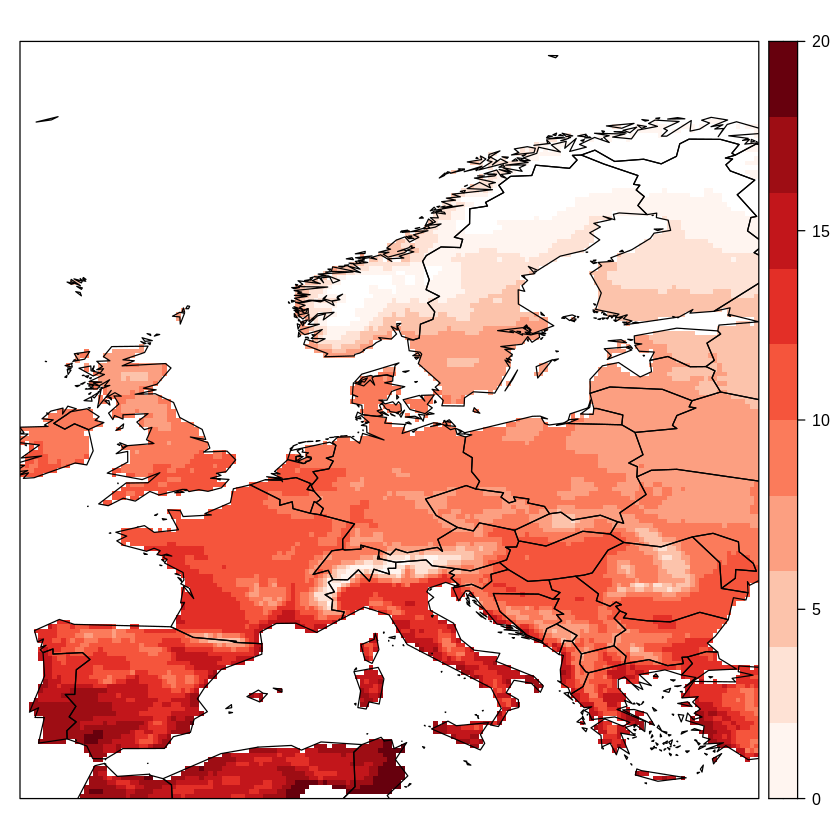

In [29]:
### Dibujo de la climatología media
color_palette <- colorRampPalette(brewer.pal(n = 9, "Reds"))
spatialPlot(grid_clim,
            backdrop.theme = "countries",
            at = seq(0, 20, 2), 
            col.regions = color_palette
            )

pad applied on the interval: day



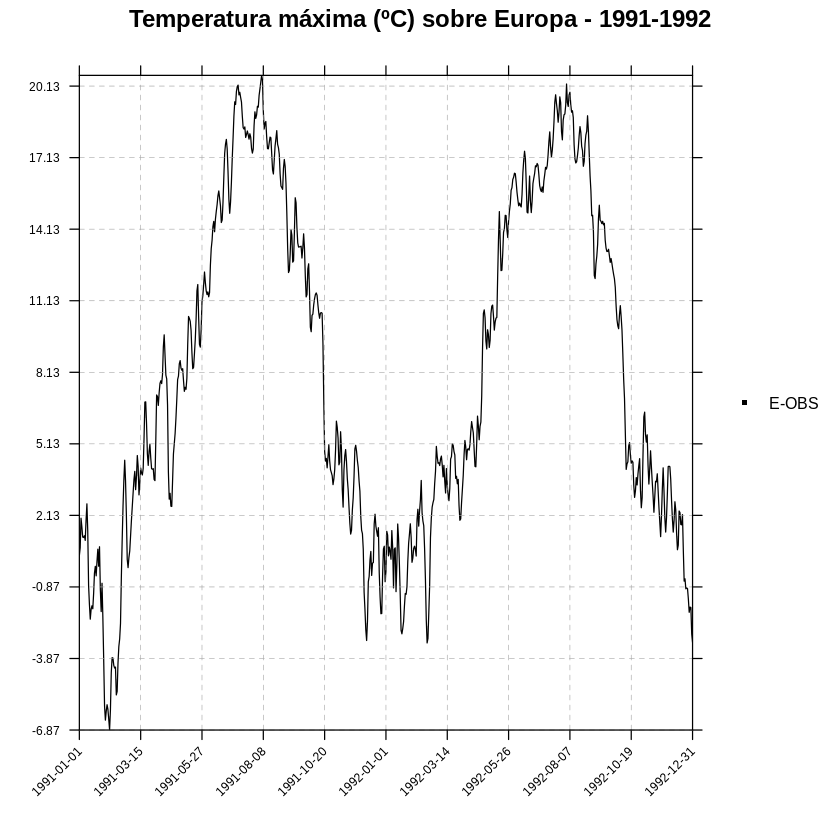

In [33]:
### Dibujo de la serie temporal de 1991-1992 
temporalPlot("E-OBS" = grid_1991_1992, 
             xyplot.custom = list(xlab = "",
                                  ylab = "",
                                  main = "Temperatura máxima (ºC) sobre Europa - 1991-1992"
                                 )
            )

pad applied on the interval: day

pad applied on the interval: day



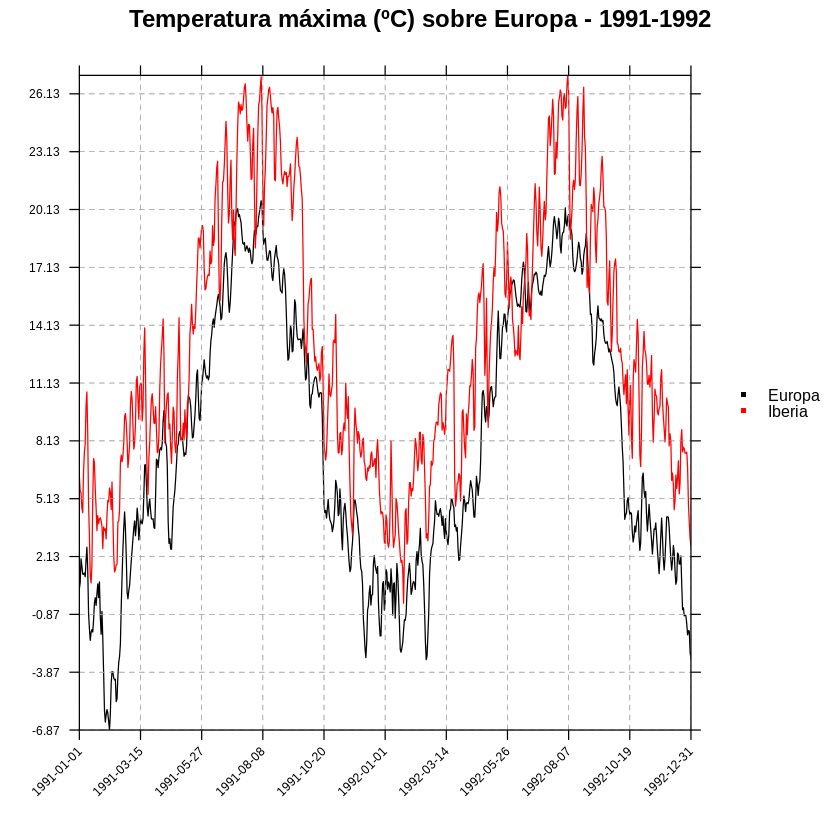

In [35]:
### Dibujo de la serie temporal de 1991-1992 para (1) toda Europa y (2) la península Ibérica
grid_1991_1992_iberia <- subsetGrid(grid, 
                          years = 1991:1992,
                          lonLim = c(-8,2), 
                          latLim = c(36,44))

temporalPlot("Europa" = grid_1991_1992, 
             "Iberia" = grid_1991_1992_iberia,
             xyplot.custom = list(xlab = "",
                                  ylab = "",
                                  main = "Temperatura máxima (ºC) sobre Europa - 1991-1992"
                                 )
            )

### 1.2.3 Ejercicios propuestos

In [ ]:
### Selecciona los meses de Julio

### Agrega cada mes de Julio haciendo la media (es decir, para cada año hacer la media)

### Dibuja la serie temporal

In [ ]:
### Selecciona únicamente la Península Ibérica (coordenadas: )

### Calcula la climatología del percentil 2 usando la función `quantile` de R 
### (mirar la ayuda si es necesario usando ?quantile).

### Dibuja el mapa espacial

In [ ]:
### ¿otro?

## 1.2 Caso de estudio: Simulaciones de modelos climáticos globales
En esta sección vamos a realizar un caso de estudio utilizando datos de simulaciones climáticas globales. El objetivo final va a ser calcular señales de cambio climático (es decir, diferencia de un estadístico/índice entre el período futuro e histórico), utilizando las librerías de climate4R.

Dado que en este caso trabajamos con simulaciones y no con E-OBS, va a haber previamente que descargarse los datos. En particular vamos a trabajar con la temperatura del aire a 850hPa (`ta@850`) del run número 12 del modelo climático EC-Earth y con los escenarios histórico y RCP8.5. La siguiente celda muestra la descarga de datos:

### 1.2.1 Escenario histórico

In [ ]:
### Cargamos los datos
grid_hist <- loadGridData('CMIP5-subset_EC-EARTH_r12i1p1_historical', 
                     var = "tas",
                     season = 1:12, 
                     years = 1990:2000, # Utilizamos un período de 10 años en vez de 30 por eficiencia computacional
                     lonLim = c(-8,2), 
                     latLim = c(36,44),
                     )  

### Calculamos la climatología
grid_hist_clim <- climatology(grid_hist, clim.fun = list(FUN = "mean", na.rm = TRUE))

### 1.2.2 Escenario RCP8.5

In [ ]:
### Cargamos los datos
grid_rcp85 <- loadGridData('CMIP5-subset_EC-EARTH_r12i1p1_rcp85', 
                     var = "tas",
                     season = 1:12, 
                     years = 2090:2100, # Utilizamos un período de 10 años en vez de 30 por eficiencia computacional
                     lonLim = c(-8,2), 
                     latLim = c(36,44),
                     )  

### Calculamos la climatología
grid_rcp85_clim <- climatology(grid_rcp85, clim.fun = list(FUN = "mean", na.rm = TRUE))

NOTE: Accessing harmonized data from a public UDG dataset

[2022-08-24 16:00:34] Defining harmonization parameters for variable "ta"

[2022-08-24 16:20:34] Opening dataset...

[2022-08-24 16:24:43] The dataset was successfuly opened

[2022-08-24 16:24:43] Defining geo-location parameters

[2022-08-24 16:24:43] Defining time selection parameters

[2022-08-24 16:27:28] Retrieving data subset ...



### 1.2.3 Señal de cambio climático

In [ ]:
### Calculamos la señal
climate_change_signal <- gridArithmetics(grid_rcp85_clim, grid_hist_clim, operator = "-")

### Dibujamos la señal
color_palette <- colorRampPalette(brewer.pal(n = 9, "Reds"))
spatialPlot(climate_change_signal,
            backdrop.theme = "countries",
            at = seq(0, 5, 0.5), 
            col.regions = color_palette
            )

### 1.2.4 Ejercicio propuesto

Ahora para Argentina, responde a las siguientes preguntas:

In [ ]:
### Carga el escenario histórico

### Carga el escenario RCP8.5

### Calcula los índices de cada escenario
 ### Media
 ### Media de los meses de verano
 ### Media de los meses de invierno
 ### El Summer Index (SU) que se define como el número de días anuales que sobrepasan los 25ºC.

### Calcula la señal de cambio climático de cada índice
 ### Media
 ### Media de los meses de verano
 ### Media de los meses de invierno
 ### El Summer Index (SU) que se define como el número de días anuales que sobrepasan los 25ºC.

### Dibuja los mapas espaciales de la señal de cambio climático
 ### Media
 ### Media de los meses de verano
 ### Media de los meses de invierno
 ### El Summer Index (SU) que se define como el número de días anuales que sobrepasan los 25ºC.

## 2. Downscaling de proyecciones climáticas

### 2.1 Carga de librerías
Cargamos las librerías llamando a la función `library`.

In [ ]:
### Librerías de climate4R
library(loadeR)
library(transformeR)
library(downscaleR)
library(visualizeR)
library(climate4R.value)

### Otras librerías
library(magrittr)

### 2.2 "Perfect-prognosis"

### 2.2.1 Cross-validación

**Carga de datos (predictores)**

**Carga de datos (predictandos)**

In [ ]:
value <- file.path(find.package("VALUE"), "example_datasets", "VALUE_ECA_86_v2.zip")
y <- loadStationData(dataset = value,
lonLim = lonLim,
latLim = latLim,
var = "precip",
years = 1979:2008) %>% binaryGrid(condition = "GE",
threshold = 1,
partial = TRUE)
y_bin <- binaryGrid(y, condition = "GE", threshold = 1)

**Ejercicio propuesto:** Realizar el mismo experimento de validación cruzada pero para un GLM de 4 (GLM4) vecinos cercanos y compara los resultados.

**Ejercicio propuesto:** Realizar el mismo experimento de validación cruzada para el GLM1 y el GLM4, para América del Sur. Dibujar el RMSE de cada modelo. 

### 2.2.2 Downscaling

**Carga de datos (predictores)**

**Estandarización (predictores)**